# 1. Packages to Import

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import nltk
import matplotlib.pyplot as plt
import os

# 2. Load and Analyse data

In [2]:
data = pd.read_csv('train.tsv', sep='\t')

print("Meta data: ")
print(data.info())

print("Data per class: ")
print(data['Sentiment'].value_counts())

Meta data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None
Data per class: 
2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


In [3]:
sentiment_count = data.groupby('Sentiment').count()
sentiment_count

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27273
2,79582,79582,79582
3,32927,32927,32927
4,9206,9206,9206


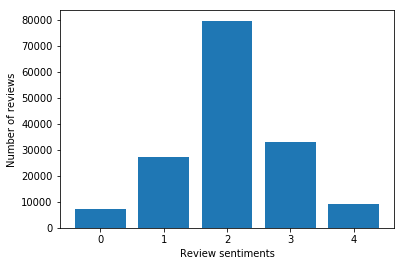

In [4]:
plt.bar(sentiment_count.index.values, sentiment_count['Phrase'])
plt.xlabel('Review sentiments')
plt.ylabel('Number of reviews')
plt.show()

In [5]:
print("First 10 rows of data: ")
data.head(10)

First 10 rows of data: 


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [6]:
chdata = data.drop(['PhraseId'], axis=1)
chdata.head()

,SentenceId,Phrase,Sentiment
0,1,A series of escapades demonstrating the adage ...,1
1,1,A series of escapades demonstrating the adage ...,2
2,1,A series,2
3,1,A,2
4,1,series,2


# 3. Examining NLTK functions

Sentence Tokenization:  ['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'] 

Word Tokenization:  ['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.'] 

Frequency:  <FreqDist with 28 samples and 37 outcomes>
[('of', 4), ('the', 3)]


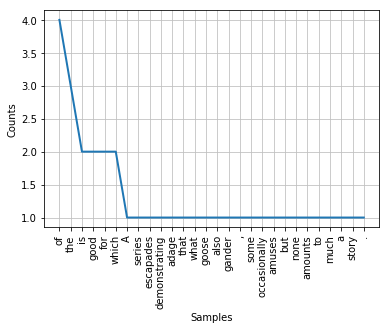

In [7]:
# taking a sample of the text to perform analysis
text = chdata.iloc[0, 1]

# sentence tokenization of text
sentence = nltk.tokenize.sent_tokenize(text)
print("Sentence Tokenization: ", sentence, "\n")

# word tokenization of text
word = nltk.tokenize.word_tokenize(text)
print("Word Tokenization: ", word, "\n")

# frequency distribution
fdist = nltk.probability.FreqDist(word)
print("Frequency: ", fdist)
print(fdist.most_common(2))

# plotting the word frequency
fdist.plot(30, cumulative=False)

First 10 Stop words:  ['any', "needn't", 'of', "should've", 'and', 'all', 'hers', 'd', 'this', 'once']
Before stoppers:  ['A', 'series', 'of', 'escapades', 'demonstrating', 'the', 'adage', 'that', 'what', 'is', 'good', 'for', 'the', 'goose', 'is', 'also', 'good', 'for', 'the', 'gander', ',', 'some', 'of', 'which', 'occasionally', 'amuses', 'but', 'none', 'of', 'which', 'amounts', 'to', 'much', 'of', 'a', 'story', '.']
After removing stoppers:  ['A', 'series', 'escapades', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', ',', 'occasionally', 'amuses', 'none', 'amounts', 'much', 'story', '.']
Plotting after removing stop words:


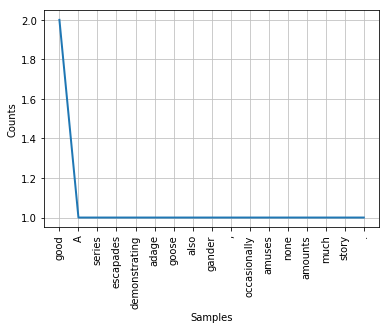

In [8]:
stopper = list(set(nltk.corpus.stopwords.words("english")))
print("First 10 Stop words: ", stopper[:10])

filtered = []

for w in word:
    if w not in stopper:
        filtered.append(w)

print("Before stoppers: ", word)
print("After removing stoppers: ", filtered)

after_stem = nltk.probability.FreqDist(filtered)
print("Plotting after removing stop words:")
after_stem.plot(30, cumulative=False)

In [9]:
# performing text normalization
# stemming
ps = nltk.stem.PorterStemmer()

stemmed = []
for w in filtered:
    stemmed.append(ps.stem(w))

print("After performing stemmings: ", stemmed)

# lemmatization - a dictionary look up
lem = nltk.stem.wordnet.WordNetLemmatizer()

lemmaed = []
for w in filtered:
    lemmaed.append(lem.lemmatize(w))

print("After performing lemmatization: ", lemmaed)

# applying pos tagging
postag = nltk.pos_tag(nltk.word_tokenize(text))
print("The resulting POS tagging:")
print(postag)

After performing stemmings:  ['A', 'seri', 'escapad', 'demonstr', 'adag', 'good', 'goos', 'also', 'good', 'gander', ',', 'occasion', 'amus', 'none', 'amount', 'much', 'stori', '.']
After performing lemmatization:  ['A', 'series', 'escapade', 'demonstrating', 'adage', 'good', 'goose', 'also', 'good', 'gander', ',', 'occasionally', 'amuses', 'none', 'amount', 'much', 'story', '.']
The resulting POS tagging:
[('A', 'DT'), ('series', 'NN'), ('of', 'IN'), ('escapades', 'NNS'), ('demonstrating', 'VBG'), ('the', 'DT'), ('adage', 'NN'), ('that', 'IN'), ('what', 'WP'), ('is', 'VBZ'), ('good', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('goose', 'NN'), ('is', 'VBZ'), ('also', 'RB'), ('good', 'JJ'), ('for', 'IN'), ('the', 'DT'), ('gander', 'NN'), (',', ','), ('some', 'DT'), ('of', 'IN'), ('which', 'WDT'), ('occasionally', 'RB'), ('amuses', 'VBZ'), ('but', 'CC'), ('none', 'NN'), ('of', 'IN'), ('which', 'WDT'), ('amounts', 'NNS'), ('to', 'TO'), ('much', 'JJ'), ('of', 'IN'), ('a', 'DT'), ('story', 'NN'), 

In [10]:
lem.lemmatize(text)

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

# 4. Reducing the corpus size

In [11]:
# function to collect the word corpus 
def collect_words(df, feature):
    all_words = []
    
    for f in df[feature]:
        wordlis = nltk.tokenize.word_tokenize(f)
        
        for word in wordlis:
            if word not in stopper:
                lemstr = lem.lemmatize(word)
                stemstr = ps.stem(word)
                # collect all the words
                all_words.append(stemstr)
            
    return all_words


corpus = collect_words(chdata, 'Phrase')
len(corpus)

729049

In [12]:
corpus[:10]

['A',
 'seri',
 'escapad',
 'demonstr',
 'adag',
 'good',
 'goos',
 'also',
 'good',
 'gander']

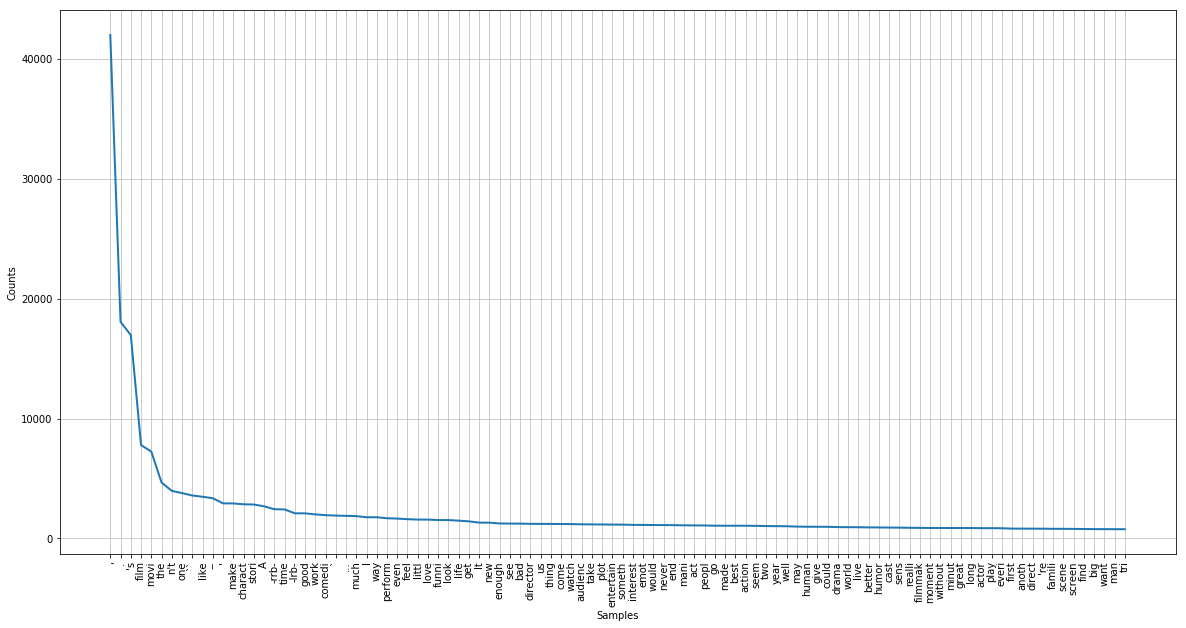

In [13]:
plt.figure(figsize=(20, 10))
corpus_freq = nltk.probability.FreqDist(corpus)
corpus_freq.plot(100, cumulative=False)

In [14]:
corpus_freq.most_common(5)

[(',', 42006), ('.', 18075), ("'s", 16971), ('film', 7787), ('movi', 7250)]

In [15]:
# function to collect all the words above and below threshold
def collect_threshold(freqd, mini_count=10, maxi_count=2000):

    high_words = freqd.copy()
    low_words = freqd.copy()
    
    for key in freqd.keys():
        if freqd[key] < maxi_count:
            del(high_words[key])
        if freqd[key] > mini_count:
            del(low_words[key])
            
    return high_words, low_words

# the newly obtained keys will then be used for further filtering
higher, lower = collect_threshold(corpus_freq)

print("Number of filtered words: ", len(higher.keys()), len(lower.keys()))

Number of filtered words:  21 4050


In [16]:
higher.keys()

dict_keys(['A', 'good', ',', 'stori', '.', "'s", 'work', 'time', 'one', 'charact', 'the', 'like', "n't", 'movi', '--', 'make', '``', 'film', "'", '-lrb-', '-rrb-'])

# 5. Feature Engineering

In [17]:
def cleaned_up(df, feature, high_words, low_words, stopper=stopper, lem=lem):
    
    new_text = []
    all_words = []
    
    for f in df[feature]:
        # list for words
        cl = []
        # words to string
        cls = ""
        
        wordlis = nltk.tokenize.word_tokenize(f)
        
        # performing lemmatization and stop words removal
        for st in wordlis:
            if st not in stopper:
                lemstr = lem.lemmatize(st)
                stemstr = ps.stem(lemstr)
            
            if stemstr not in high_words and stemstr not in low_words:
                # collect all the words
                all_words.append(stemstr)
                # collect words that are filtered
                cl.append(stemstr)
        
        if len(cl) == 0:
            cls = ""
        
        else:
            cls = cl[0]
            for st in range(1, len(cl)):
                cls = cls + " " + cl[st]
                
        new_text.append(cls)
    
    return new_text, all_words

cleaned_text, full_set = cleaned_up(data, 'Phrase', higher, lower)
#data = data.drop(columns=['PhraseId'])

In [18]:
cleaned_text[:10]

['seri seri escapad demonstr demonstr adag adag adag adag goos goos also occasion amus amus none none none amount amount much much much',
 'seri seri escapad demonstr demonstr adag adag adag adag goos',
 'seri',
 '',
 'seri',
 'seri escapad demonstr demonstr adag adag adag adag goos',
 'goos',
 'escapad demonstr demonstr adag adag adag adag goos',
 'escapad',
 'demonstr demonstr adag adag adag adag goos']

In [19]:
data['cleaned_text'] = cleaned_text
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_text
0,1,1,A series of escapades demonstrating the adage ...,1,seri seri escapad demonstr demonstr adag adag ...
1,2,1,A series of escapades demonstrating the adage ...,2,seri seri escapad demonstr demonstr adag adag ...
2,3,1,A series,2,seri
3,4,1,A,2,
4,5,1,series,2,seri
5,6,1,of escapades demonstrating the adage that what...,2,seri escapad demonstr demonstr adag adag adag ...
6,7,1,of,2,goos
7,8,1,escapades demonstrating the adage that what is...,2,escapad demonstr demonstr adag adag adag adag ...
8,9,1,escapades,2,escapad
9,10,1,demonstrating the adage that what is good for ...,2,demonstr demonstr adag adag adag adag goos


Total number of words after all filteration: 


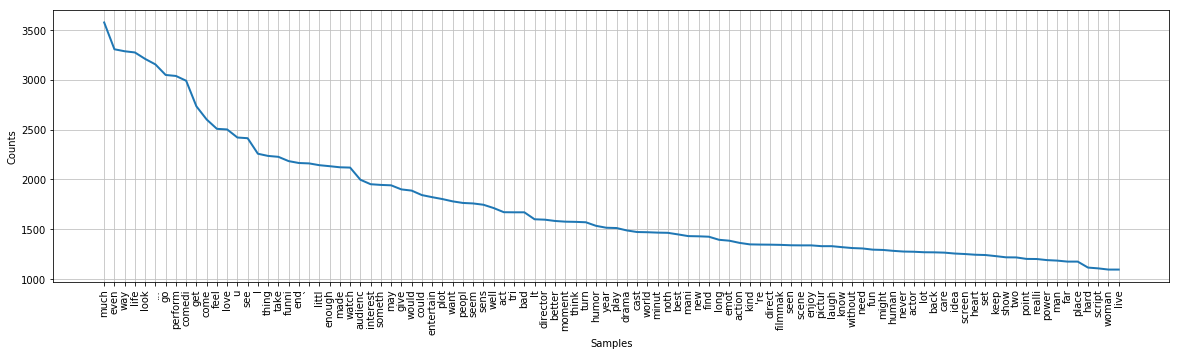

In [20]:
# plotting the final frequency plot of all the filtered words
plotting = nltk.probability.FreqDist(full_set)
print("Total number of words after all filteration: ", )
plt.figure(figsize=(20, 5))
plotting.plot(100, cumulative=False)

In [21]:
def getclass(df, uqv, minval):
    filt = data['Sentiment'] == uqv
    filtidx = []
    
    for idx in range(len(filt)):
        if filt[idx] == True:
            filtidx.append(idx)
            
    filtset = np.random.choice(filtidx, mini, replace=False)
    df = data.iloc[filtset, :]
    
    print(uqv, df.shape)
    return df

In [22]:
# evening out the samples, making sure that each class has equal number of samples!
uqval = data['Sentiment'].value_counts()
mini = min(uqval)
res = []

for i in range(len(uqval)):
    m = getclass(data, uqval.index[i], mini)
    res.append(m)

2 (7072, 5)
3 (7072, 5)
1 (7072, 5)
4 (7072, 5)
0 (7072, 5)


In [23]:
fin = pd.concat(res, axis=0)
fin.head()

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_text
48522,48523,2371,"those visual in-jokes , as in the film 's verb...",2,style visual in-jok verbal poke poke everyth e...
58110,58111,2928,confined to a single theater company and its s...,2,confin confin confin singl theater compani com...
55471,55472,2768,rush right out,2,rush right right
69958,69959,3559,likably,2,likabl
66627,66628,3383,-LRB- and literally -RRB-,2,liter
